## Task

Your task is to:

1. suggest the quality metric and validation procedure for churn prediction model,
1. build a baseline solution,
1. make some experiments for solution improvement. 

It is a good opportunity to prove that you can deal with a dataset, including heterogeneous noisy data (numerical and categorical variables), and unbalanced class distributions. Time efficiency is often a crucial point.



## Solution

### 1. Suggest the quality metric and validation procedure for churn prediction model,

As quality metric I will use
* Accuracy score
* ROC-AUC

averaged by cross-validation folds

### 2. Build a baseline solution

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
path = './data/'

In [5]:
orange_data = pd.read_csv(path + 'orange_small_train.data', sep='\t')

In [6]:
orange_data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


In [7]:
counts = orange_data.count(axis=0)

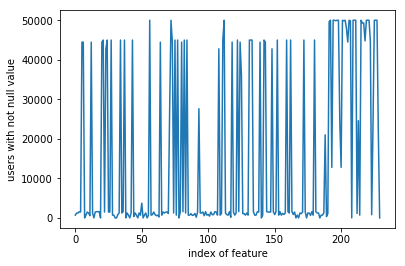

In [8]:
plt.plot(np.asarray(counts))
plt.xlabel('index of feature')
plt.ylabel('users with not null value')
plt.show()

Let's call feature *popular* if it has more than ~40.000 users with not null values


There two kinds of border cases:
* Features for which there less than ~2000 users with not null values
* Users with null values for popular features

**Hypothesis:** maybe users who don't have popular features are special?

Let's select all such users:

In [9]:
popular = counts[counts > 40000].keys()

In [10]:
orange_data_popular = orange_data[popular]

In [11]:
special_users = orange_data_popular[pd.isnull(orange_data_popular).any(axis=1)]

In [12]:
special_users_counts = special_users.count(axis=0)

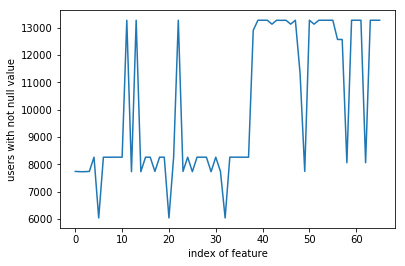

In [13]:
plt.plot(np.asarray(special_users_counts))
plt.xlabel('index of feature')
plt.ylabel('users with not null value')
plt.show()

**Conlusion:** okay, hypothesis doesn't seem to be right

Then in order to get rid of most of null values let's leave only popular features:

In [14]:
orange_data_popular.columns.size

66

We got singificantly less number of features (we had 230) but it's okay because there are a lot of features which are known only for less than 2000 (4%) users:

In [15]:
not_popular = counts[counts < 2000].keys()

In [16]:
orange_data_not_popular = orange_data[not_popular]

In [17]:
orange_data_not_popular.columns.size

153

**Hypothesis:** maybe users with such rare features are special and should be classified separately

Let's select users with not null values for not popular features

In [18]:
special_users_not_popular = orange_data_not_popular[pd.notnull(orange_data_not_popular).any(axis=1)]

In [19]:
special_users_not_popular_counts = special_users_not_popular.count(axis=0)

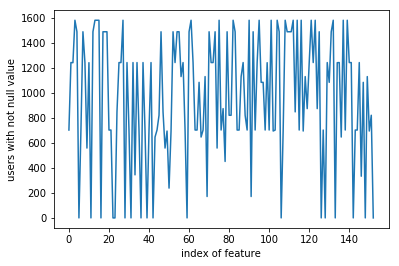

In [20]:
plt.plot(np.asarray(special_users_not_popular_counts))
plt.xlabel('index of feature')
plt.ylabel('users with not null value')
plt.show()

**Conlusion:** okay, this hypothesis also doesn't seem to be right

Then let's continue analysis with popular features:

In [21]:
orange_data_popular.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,xb3V,RAYp,F2FyR07IdsN7I
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,Qu4f,02N6s8f,ib5G6X1eUxUn6
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,...,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I


Let's try to get rid of users for which we don't know much:

In [22]:
users_counts = orange_data_popular.count(axis=1)

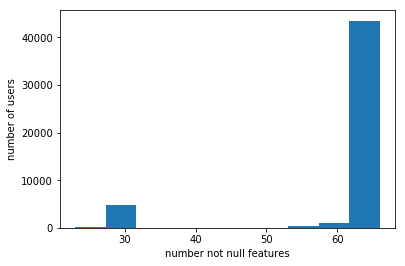

In [23]:
plt.hist(np.asarray(users_counts))
plt.xlabel('number not null features')
plt.ylabel('number of users')
plt.show()

In [24]:
np.histogram(users_counts, bins=[10, 20, 30, 31, 50, 60, 61, 62, 63, 64, 65, 66])

(array([    0,  1570,  3439,     0,   571,   637,   290,   157,  1498,
         3627, 38211]),
 array([10, 20, 30, 31, 50, 60, 61, 62, 63, 64, 65, 66]))

In [25]:
users_counts[users_counts == 66].size

36730

In [26]:
good_users_indexes = users_counts[users_counts == orange_data_popular.columns.size].keys()

In [27]:
orange_data_cleaned = orange_data_popular.iloc()[good_users_indexes]

### Read labels:

In [28]:
labels = pd.read_csv(path + 'orange_large_train_churn.labels.txt', header=None)

In [29]:
np.histogram(labels, bins=[-1, 0, 1])

(array([46328,  3672]), array([-1,  0,  1]))

In [30]:
labels_cleaned = labels.iloc()[good_users_indexes]

In [31]:
np.histogram(labels_cleaned, bins=[-1, 0, 1])

(array([34039,  2691]), array([-1,  0,  1]))

Ratios of classes are approximately the same before and after cleaning:

In [32]:
print('Before ratio = ' + str(46328 / 3672))
print('After ratio = ' + str(34039 / 2691))

Before ratio = 12.616557734204793
After ratio = 12.649201040505389


### Make some preprocessing

In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [34]:
scaler = StandardScaler()

In [35]:
orange_data_cleaned.columns

Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var73', 'Var74', 'Var76',
       'Var78', 'Var81', 'Var83', 'Var85', 'Var109', 'Var112', 'Var113',
       'Var119', 'Var123', 'Var125', 'Var132', 'Var133', 'Var134', 'Var140',
       'Var143', 'Var144', 'Var149', 'Var153', 'Var160', 'Var163', 'Var173',
       'Var181', 'Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var198',
       'Var199', 'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207',
       'Var208', 'Var210', 'Var211', 'Var212', 'Var216', 'Var217', 'Var218',
       'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var226', 'Var227',
       'Var228'],
      dtype='object')

In [36]:
numerical_features = orange_data_cleaned.columns[:-28]

In [37]:
orange_data_cleaned[numerical_features] = scaler.fit_transform(orange_data_cleaned[numerical_features])

/home/gelkin/Development/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/gelkin/Development/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [38]:
orange_data_cleaned.shape

(36730, 66)

### Let's take a look at correlations with label

In [39]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 100)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    ax1.set_xticklabels(labels,fontsize=10)
    ax1.set_yticklabels(labels,fontsize=10)
    
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

In [40]:
df_for_corr = orange_data_cleaned.copy()

In [41]:
df_for_corr['label'] = labels_cleaned

In [53]:
df_for_corr[df_for_corr.columns[-28:-1]].corr()

""


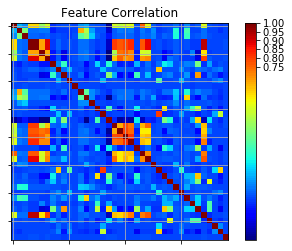

In [42]:
correlation_matrix(df_for_corr)

Let's transform categorical features to numerical:

In [43]:
orange_data_cleaned.columns[-28:]

Index(['Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199',
       'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207', 'Var208',
       'Var210', 'Var211', 'Var212', 'Var216', 'Var217', 'Var218', 'Var219',
       'Var220', 'Var221', 'Var222', 'Var223', 'Var226', 'Var227', 'Var228'],
      dtype='object')

In [44]:
data_copy = orange_data_cleaned.copy()

In [45]:
categorical_cols = orange_data_cleaned.columns[-28:]

In [47]:
from sklearn.feature_extraction import FeatureHasher

In [49]:
h = FeatureHasher(n_features=20)

In [54]:
# h.fit_transform(data_copy[categorical_cols])

Let's analyze categorical features and see how many different values categorical features can have:

In [69]:
from collections import Counter

In [92]:
plt.rcParams["figure.figsize"] = (10,5)

Var192 320


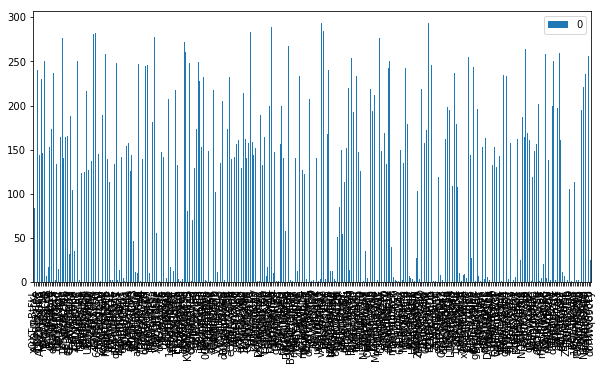




Var193 51


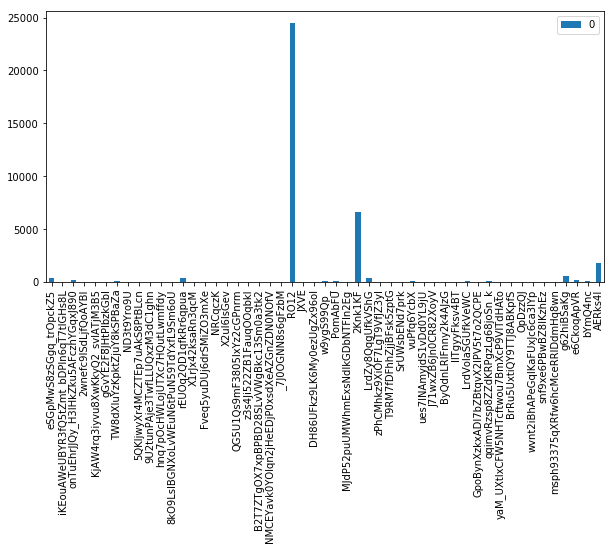




Var195 22


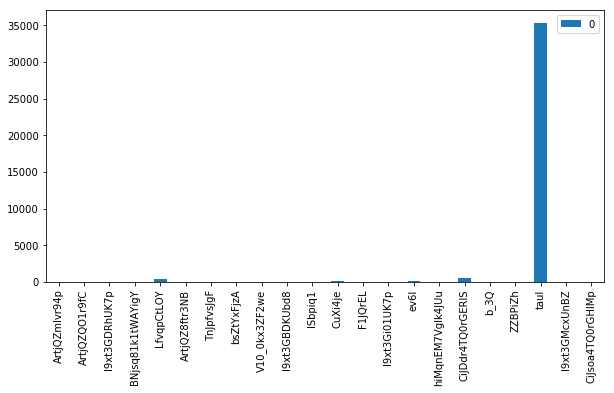




Var196 4


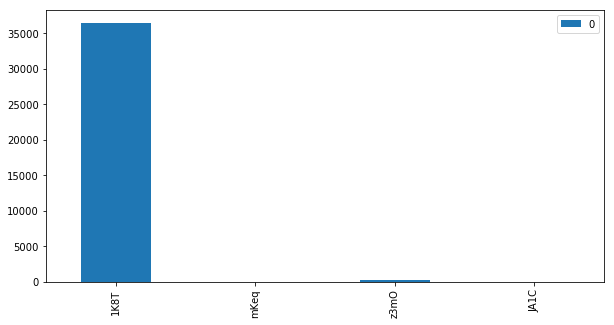




Var197 219


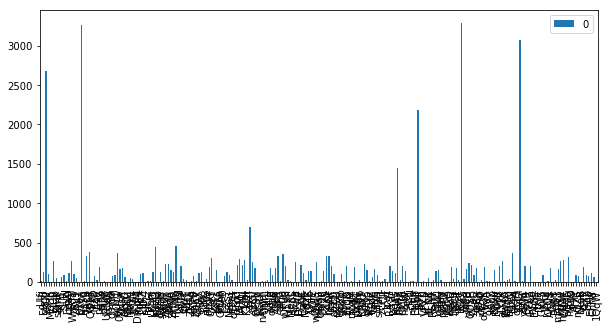




Var198 3521
Var199 3866
Var202 5431
Var203 4


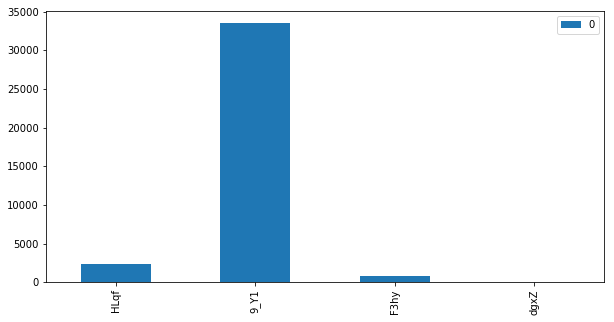




Var204 100


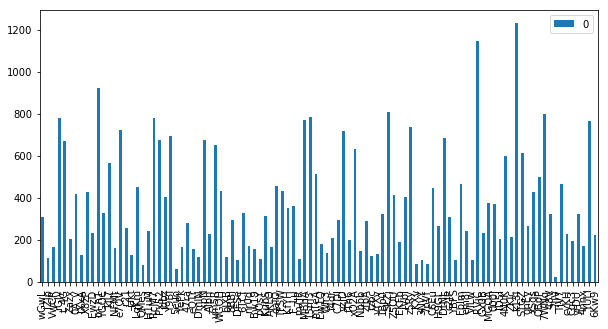




Var205 3


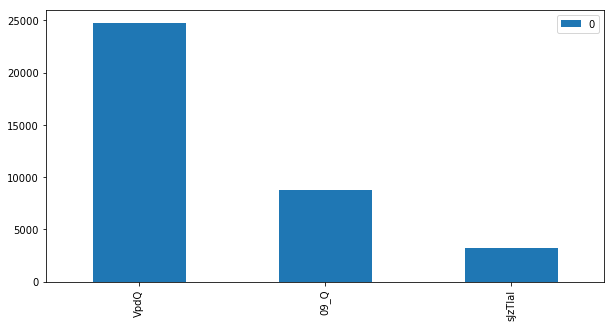




Var206 21


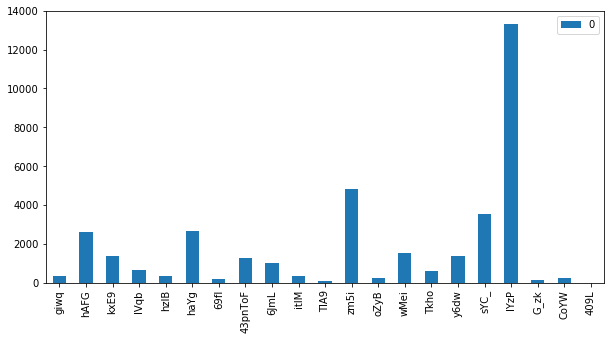




Var207 14


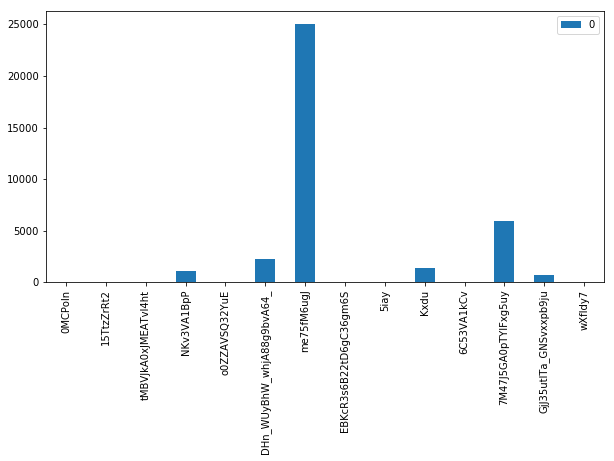




Var208 2


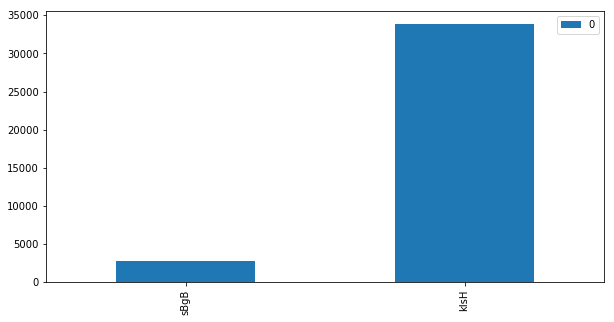




Var210 4


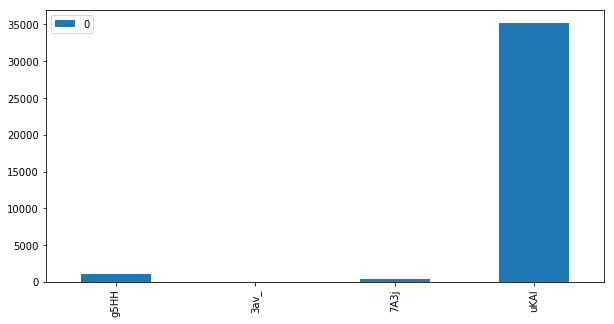




Var211 2


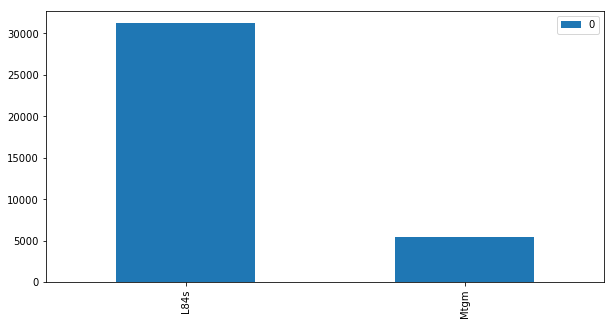




Var212 79


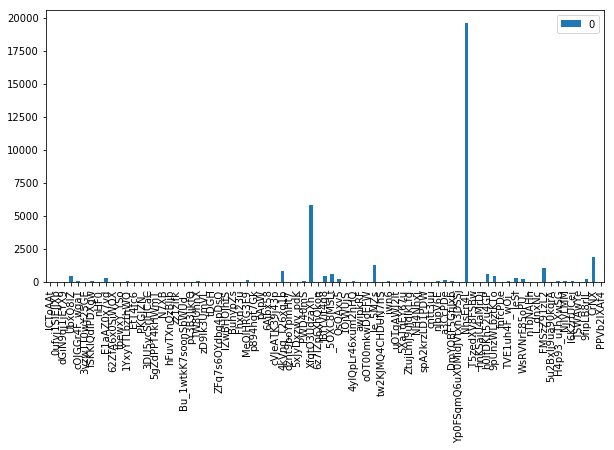




Var216 1826
Var217 11984
Var218 2


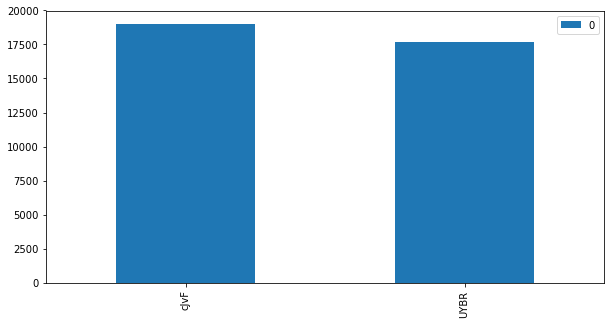




Var219 22


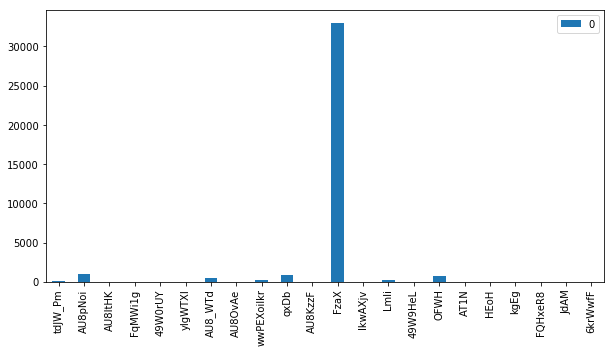




Var220 3521
Var221 7


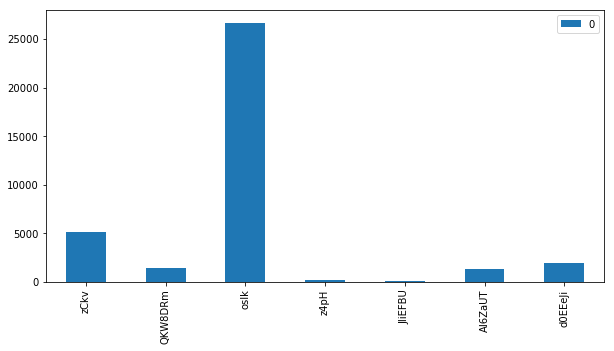




Var222 3521
Var223 4


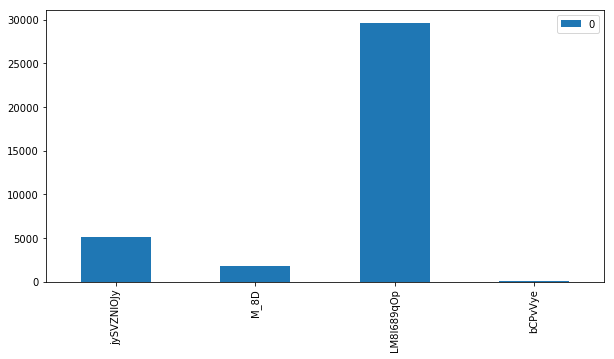




Var226 23


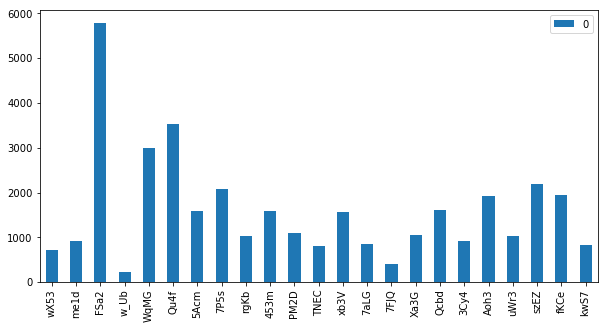




Var227 7


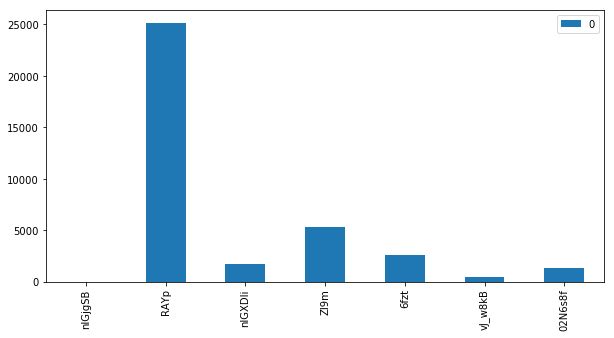




Var228 29


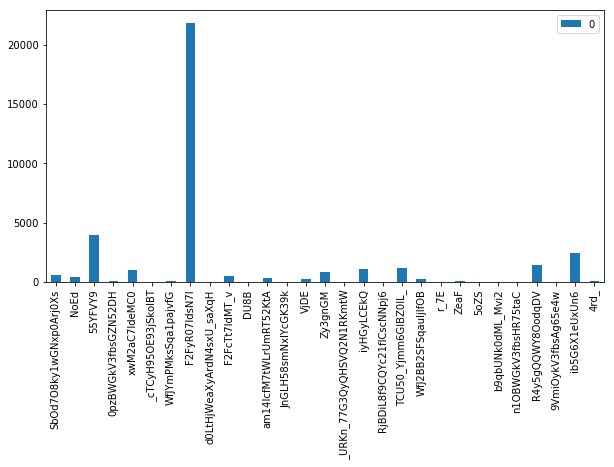

In [98]:
for col in categorical_cols:
    column_arr = np.asarray(orange_data_cleaned[col])
    n_values = len(set(column_arr.reshape(column_arr.shape[0],)))
    print(col + ' ' + str(n_values))
    if n_values > 400:
        continue
    
    column_counts = Counter(list(column_arr))
    df = pd.DataFrame.from_dict(column_counts, orient='index')
    df.plot(kind='bar')
    plt.show()
    
    print("\n\n")


Conlusions from categorical feature distributions:
1. Following features have too many different values and should be removed:
Var198 3521
Var199 3866
Var202 5431
Var216 1826
Var217 11984
Var220 3521
Var222 3521

2. Var192 - looks like normal distribution. Can be removed
3. Var195, Var196, Var203, Var210, Var219 - has only one significant value, can be removed

Also:
* Var204, Var226 - too many values, looks like normal distribution
* Var212, Var197, Var228, Var193, Var206, Var207 - too many values, looks like doesn't metter

In [110]:
bad_categorical_feats = {'Var192', 'Var195', 'Var196', 'Var198', 'Var199', 'Var202', 'Var203',
                         'Var210', 'Var216', 'Var217', 'Var219', 'Var220', 'Var222', 'Var204',
                         'Var212', 'Var197', 'Var228', 'Var193', 'Var206', 'Var226', 'Var207'}

In [114]:
good_cat_feats = set(categorical_cols) - bad_categorical_feats

{'Var205', 'Var208', 'Var211', 'Var218', 'Var221', 'Var223', 'Var227'}

Var205 3


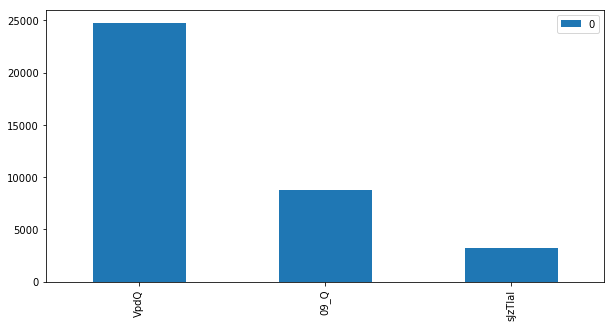




Var208 2


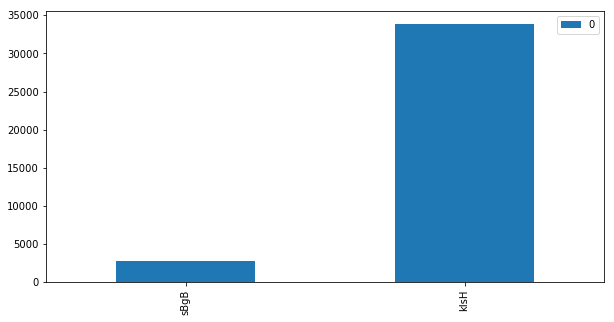




Var227 7


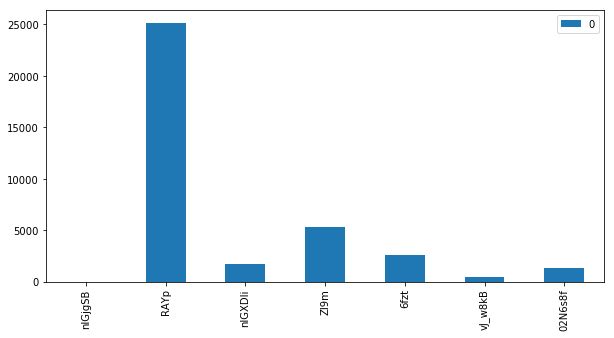




Var223 4


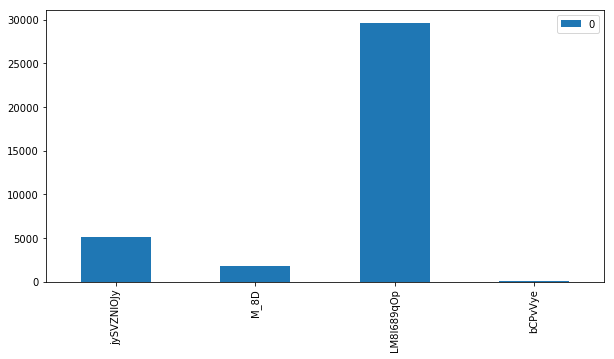




Var221 7


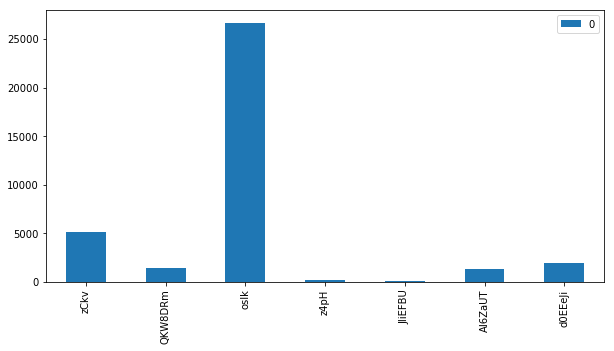




Var211 2


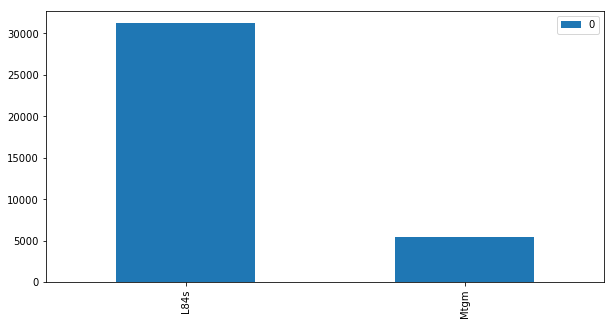




Var218 2


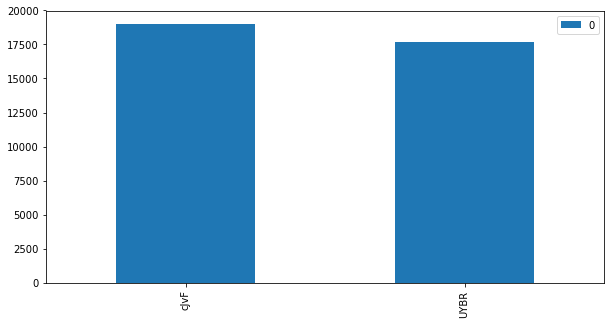

In [112]:
for col in good_cat_feats:
    column_arr = np.asarray(orange_data_cleaned[col])
    n_values = len(set(column_arr.reshape(column_arr.shape[0],)))
    print(col + ' ' + str(n_values))
    
    column_counts = Counter(list(column_arr))
    df = pd.DataFrame.from_dict(column_counts, orient='index')
    df.plot(kind='bar')
    plt.show()
    
    print("\n\n")

In [117]:
orange_data_super = orange_data_cleaned.drop(list(bad_categorical_feats), axis=1)

### Let's vectorize categorical data

In [122]:
orange_data_vectorized = pd.get_dummies(orange_data_super)

In [123]:
orange_data_vectorized.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var223_M_8D,Var223_bCPvVye,Var223_jySVZNlOJy,Var227_02N6s8f,Var227_6fzt,Var227_RAYp,Var227_ZI9m,Var227_nIGXDli,Var227_nIGjgSB,Var227_vJ_w8kB
0,0.048018,-0.058717,-0.406192,0.383661,0.383661,0.943829,0.111267,-0.618272,-0.243794,-0.887546,...,0,0,1,0,0,1,0,0,0,0
2,1.414282,-0.058717,-0.160435,1.695516,1.695516,2.151081,3.237751,-0.066101,-0.243794,1.062869,...,0,0,1,1,0,0,0,0,0,0
4,-0.135010,-0.058717,0.628719,-0.317866,-0.317866,-0.062214,-0.179569,-0.273268,-0.243794,-0.888730,...,0,0,0,0,0,1,0,0,0,0
5,-0.271637,-0.058717,0.608239,-0.037255,-0.037255,-0.263423,-0.143215,-0.273268,1.424344,-0.888730,...,0,0,0,1,0,0,0,0,0,0
6,0.104731,-0.058717,0.538608,0.110066,0.110066,-0.062214,0.111267,-0.515101,-0.243794,-0.884366,...,0,0,0,0,0,1,0,0,0,0


### Run classifier

In [148]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation

In [149]:
orange_data_vectorized.shape
# labels_cleaned.shape

(36730, 65)

In [150]:
X = orange_data_vectorized.as_matrix()
y = np.asarray(labels_cleaned).reshape(labels_cleaned.shape[0],)

In [154]:
print(cross_val_score(LogisticRegression(), X, y).mean())

0.926653963454


In [153]:
kf = cross_validation.KFold(orange_data_vectorized.shape[0], n_folds=5)
for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LogisticRegression()
    model.fit(X_train, y_train)
    print(confusion_matrix(y_test, model.predict(X_test)))

[[6795    2]
 [ 549    0]]
[[6786    1]
 [ 559    0]]
[[6818    0]
 [ 528    0]]
[[6794    1]
 [ 551    0]]
[[6842    0]
 [ 504    0]]


**Conclusion:** model doesn't predict other class at all

Let's increase weight of the other class: add copies

In [179]:
chorn_users = labels_cleaned[labels_cleaned == 1].dropna()

In [198]:
np.asarray(orange_data_vectorized.index)

array([    0,     2,     4, ..., 49996, 49997, 49999])

In [194]:
chorn_users.index

Int64Index([    4,    27,    32,    34,    39,    43,    53,    59,    60,
               64,
            ...
            49839, 49890, 49923, 49932, 49937, 49966, 49970, 49978, 49988,
            49999],
           dtype='int64', length=2691)

In [205]:
minor_class_users = orange_data_vectorized.ix()[list(np.asarray(chorn_users.index))]

In [217]:
minor_class_labels = labels_cleaned.ix()[list(np.asarray(chorn_users.index))]

In [ ]:
minor_class_labels

In [208]:
new_df = orange_data_vectorized.append(minor_class_users)

In [210]:
orange_data_vectorized.shape

(36730, 65)

In [254]:
ratio = (34039 // 2691) // 2
ratio

6

In [255]:
new_data = orange_data_vectorized.copy()
new_labels = labels_cleaned.copy()

In [256]:
new_data.shape

(36730, 65)

In [257]:
new_labels.shape

(36730, 1)

In [258]:
for i in range(ratio):
    new_data = new_data.append(minor_class_users)
    new_labels = new_labels.append(minor_class_labels)

In [259]:
new_data.shape

(52876, 65)

In [260]:
new_labels.shape

(52876, 1)

### Run tests:

In [261]:
X = new_data.as_matrix()
y = np.asarray(new_labels).reshape(new_labels.shape[0],)

In [262]:
print(cross_val_score(LogisticRegression(), X, y).mean())

0.643675777697


In [264]:
kf = cross_validation.KFold(new_data.shape[0], n_folds=5)
for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LogisticRegression()
    model.fit(X_train, y_train)
    print(confusion_matrix(y_test, model.predict(X_test)))

[[9526  234]
 [ 791   25]]
[[9607  216]
 [ 733   19]]
[[9613  183]
 [ 748   31]]
[[4657    3]
 [5902   13]]
[[    0     0]
 [10559    16]]
